In [7]:
import qiskit
import qiskit.quantum_info
import numpy as np
%load_ext autoreload
%autoreload 2

def qft_Qiskit(num_qubits):

    """QFT on the first n qubits in circuit"""
    def qft_rotations_Qiskit(qc: qiskit.QuantumCircuit, num_qubits):
        """Performs qft on the first n qubits in circuit (without swaps)"""
        if num_qubits == 0:
            return qc
        num_qubits -= 1
        qc.h(num_qubits)
        for j in range(num_qubits):
            
            qc.rz(np.pi/2**(num_qubits-j) / 2, num_qubits)
            qc.cx(j, num_qubits)
            qc.rz(-np.pi/2**(num_qubits-j) / 2, num_qubits)
            qc.cx(j, num_qubits)
            qc.rz(+np.pi/2**(num_qubits-j) / 2, num_qubits)
            
            # qc.cp(np.pi/2**(num_qubits-j), j, num_qubits)
            # qc.barrier()
        qft_rotations_Qiskit(qc, num_qubits)
    def swap_registers_Qiskit(qc: qiskit.QuantumCircuit, num_qubits):
        for j in range(num_qubits//2):
            qc.cx(j, num_qubits-j-1)
            qc.cx(num_qubits-j-1, j)
            qc.cx(j, num_qubits-j-1)
            # qc.barrier()
        return qc
    qc = qiskit.QuantumCircuit(num_qubits)
    qft_rotations_Qiskit(qc, num_qubits)
    swap_registers_Qiskit(qc, num_qubits)
    return qc


qc = qft_Qiskit(5)
print(qiskit.quantum_info.Statevector.from_instruction(qc).data)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[-0.13098289-0.11871597j  0.10530575-0.14198837j  0.09088138-0.15162643j
  0.15980424+0.07558178j  0.05955427-0.16644305j  0.17147892+0.04295323j
  0.17486335+0.02593853j -0.00867402+0.17656376j -0.00867402-0.17656376j
  0.17486335-0.02593853j  0.17147892-0.04295323j  0.05955427+0.16644305j
  0.15980424-0.07558178j  0.09088138+0.15162643j  0.10530575+0.14198837j
 -0.13098289+0.11871597j -0.13098289-0.11871597j  0.10530575-0.14198837j
  0.09088138-0.15162643j  0.15980424+0.07558178j  0.05955427-0.16644305j
  0.17147892+0.04295323j  0.17486335+0.02593853j -0.00867402+0.17656376j
 -0.00867402-0.17656376j  0.17486335-0.02593853j  0.17147892-0.04295323j
  0.05955427+0.16644305j  0.15980424-0.07558178j  0.09088138+0.15162643j
  0.10530575+0.14198837j -0.13098289+0.11871597j]


In [5]:
qc_trans = qiskit.transpile(qc, basis_gates=['h', 's', 'cx', 'rx', 'ry', 'rz'])
print(qiskit.quantum_info.Statevector.from_instruction(qc_trans).data)

[0.1767767+1.38777878e-17j 0.1767767+1.38777878e-17j
 0.1767767+1.04083409e-16j 0.1767767+5.55111512e-17j
 0.1767767+1.38777878e-17j 0.1767767+1.38777878e-17j
 0.1767767+6.93889390e-17j 0.1767767+6.93889390e-17j
 0.1767767+6.93889390e-18j 0.1767767+6.93889390e-18j
 0.1767767+9.02056208e-17j 0.1767767+6.24500451e-17j
 0.1767767+6.93889390e-18j 0.1767767+6.93889390e-18j
 0.1767767+4.85722573e-17j 0.1767767+4.85722573e-17j
 0.1767767+1.38777878e-17j 0.1767767+1.38777878e-17j
 0.1767767+1.04083409e-16j 0.1767767+5.55111512e-17j
 0.1767767+1.38777878e-17j 0.1767767+1.38777878e-17j
 0.1767767+6.93889390e-17j 0.1767767+6.93889390e-17j
 0.1767767+6.93889390e-18j 0.1767767+6.93889390e-18j
 0.1767767+9.02056208e-17j 0.1767767+6.24500451e-17j
 0.1767767+6.93889390e-18j 0.1767767+6.93889390e-18j
 0.1767767+4.85722573e-17j 0.1767767+4.85722573e-17j]


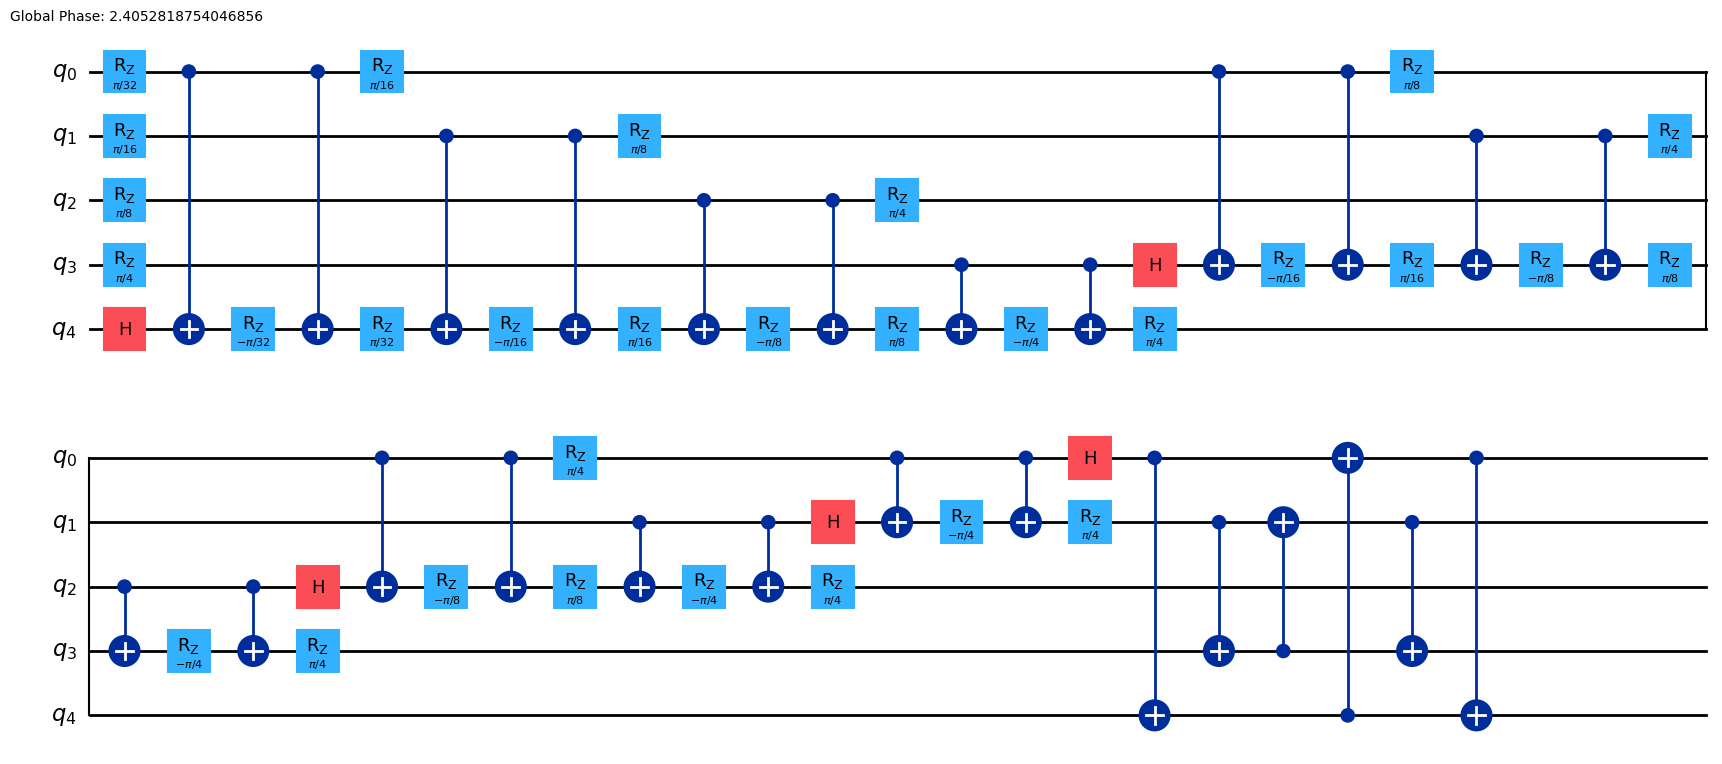

In [6]:
qc_trans.draw(output='mpl')

[0.04419417-2.45326947e-18j 0.04419417-2.45326947e-18j
 0.04419417+0.00000000e+00j 0.04419417+0.00000000e+00j
 0.04419417+0.00000000e+00j 0.04419417+0.00000000e+00j
 0.04419417+2.45326947e-18j 0.04419417+2.45326947e-18j
 0.04419417-2.45326947e-18j 0.04419417-2.45326947e-18j
 0.04419417+0.00000000e+00j 0.04419417+0.00000000e+00j
 0.04419417+0.00000000e+00j 0.04419417+0.00000000e+00j
 0.04419417+2.45326947e-18j 0.04419417+2.45326947e-18j
 0.04419417-2.45326947e-18j 0.04419417-2.45326947e-18j
 0.04419417+0.00000000e+00j 0.04419417+0.00000000e+00j
 0.04419417+0.00000000e+00j 0.04419417+0.00000000e+00j
 0.04419417+2.45326947e-18j 0.04419417+2.45326947e-18j
 0.04419417+2.45326947e-18j 0.04419417+2.45326947e-18j
 0.04419417+0.00000000e+00j 0.04419417+0.00000000e+00j
 0.04419417+0.00000000e+00j 0.04419417+0.00000000e+00j
 0.04419417+4.90653893e-18j 0.04419417+4.90653893e-18j
 0.04419417-2.45326947e-18j 0.04419417-2.45326947e-18j
 0.04419417+0.00000000e+00j 0.04419417+0.00000000e+00j
 0.0441941

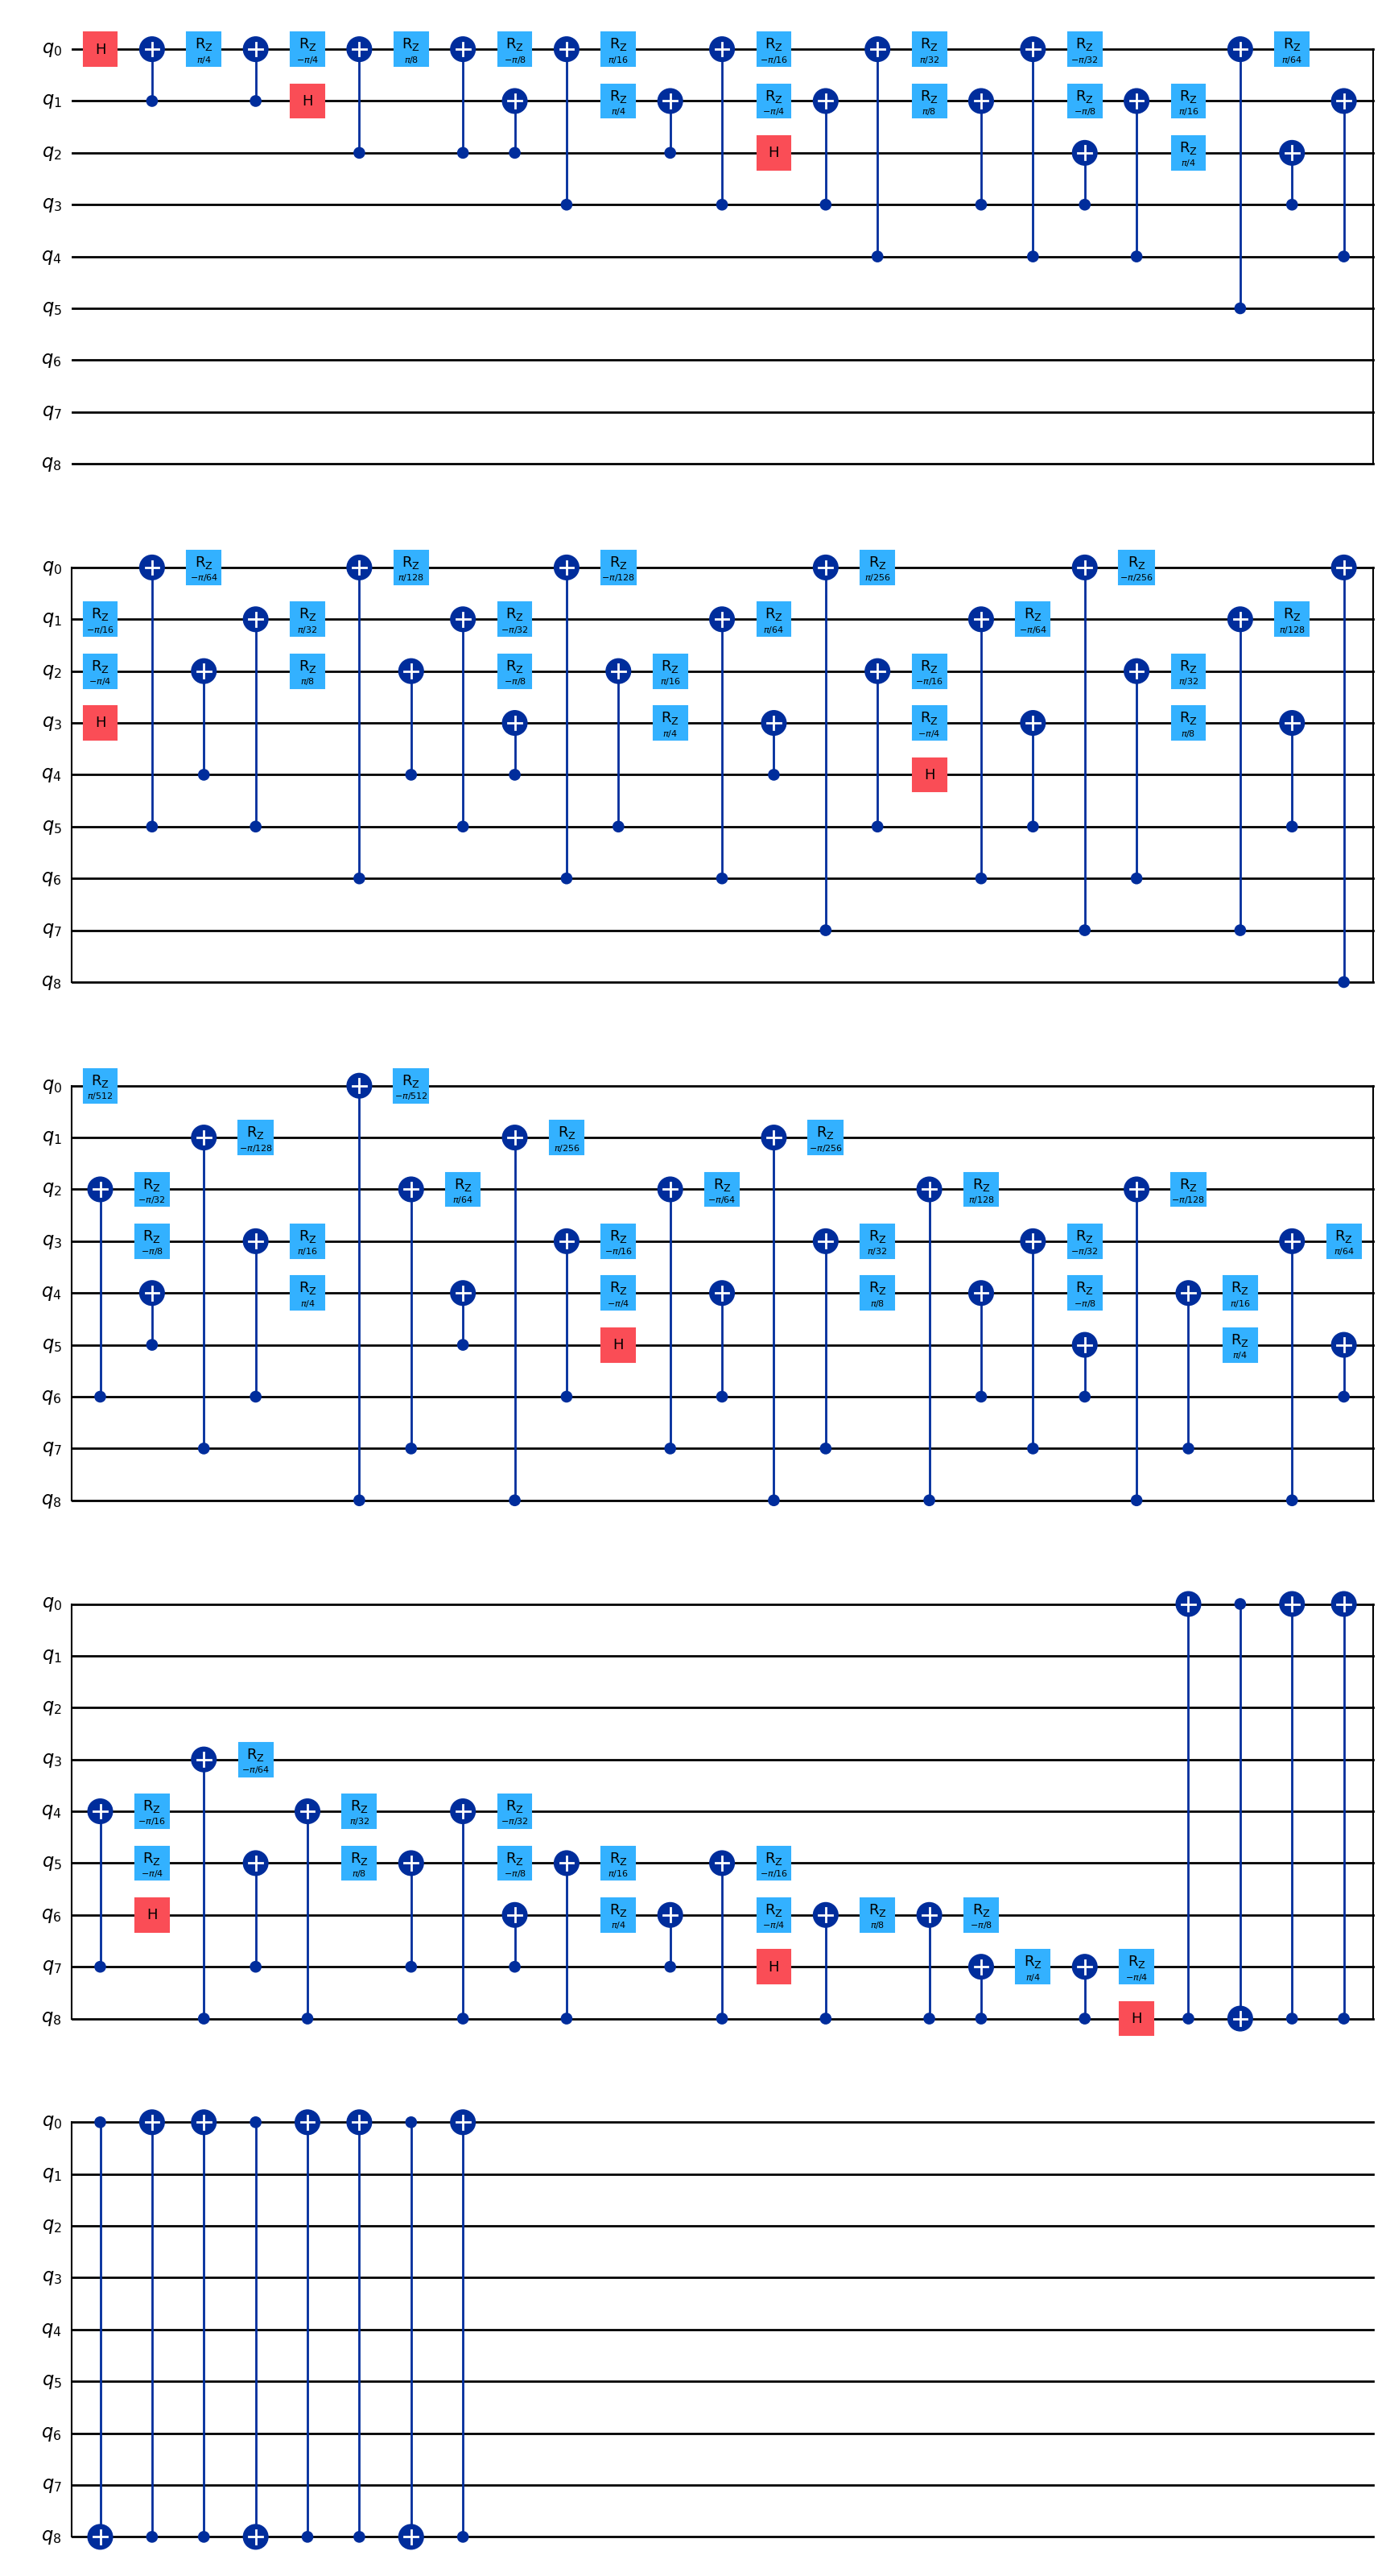

In [12]:
from qiskit import QuantumCircuit
from numpy import pi

def qft(n):
    """Creates a QFT circuit on n qubits using only 1-qubit gates and CX."""
    qc = QuantumCircuit(n)
    
    for j in range(n):
        qc.h(j)  # Hadamard gate
        for k in range(j+1, n):
            angle = pi / (2 ** (k - j))  # Correct phase shift
            qc.cx(k, j)
            qc.rz(angle / 2, j)  # Phase rotation on target qubit
            qc.cx(k, j)
            qc.rz(-angle / 2, j)  # Undo unwanted phase shift
    # Swap qubits at the end to match QFT output order
    for i in range(n // 2):

        qc.cx(j, n-j-1)
        qc.cx(n-j-1, j)
        qc.cx(j, n-j-1)
    return qc

# Example: 3-qubit QFT
qc = qft(9)
print(qiskit.quantum_info.Statevector.from_instruction(qc).data)
qc.draw("mpl")
